In [1]:
import sys
import numpy as np
import time
import matplotlib.pyplot as plt
from scipy import interpolate 
sys.path.append(r'C:\Chuji\Code_and_Data\MyCode')

import Circuit_Simulator 
import PulseGenerator as PG
from toolfunc import *
from toolfunc.adia_analysis import *
from toolfunc.pulse_filter import *
import scipy.optimize as sci_op
from toolfunc import DE
from Circuit_Simulator.Qobj import *

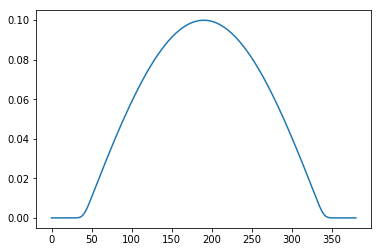

In [2]:
gate_time=30e-9
SRATE=10e9
f_term=1
lamb1 = 1
total_len = gate_time + 8e-9

# Seq=PG.Sequence(total_len=total_len,sample_rate=SRATE,complex_trace=False)
# Seq.clear_pulse(tips_on=False)
# Seq.add_pulse('Adiabatic',t0=total_len/2,width=gate_time,plateau=0e-9,frequency=0,F_Terms=f_term,Lcoeff=np.array(lamb1),Q1_freq=6.0e9,
#              CPLR_idle_freq=7.87e9,Q2_freq=5.4e9,constant_coupling=False,r1c=0.018,r2c=0.018,r12=0.0015,anhar_CPLR=-300e6,
#              anhar_Q1=-250e6,anhar_Q2=-250e6,negative_amplitude=False,dfdV=7.87e9-1e9,gap_threshold=8e6,freqpoints=301,pulsepoints=601)
# Seq.add_filter('Gauss Low Pass',300e6)
# flux_pulse=Seq.get_sequence()
# flux_pulse[0]=0

Seq=PG.Sequence(total_len=total_len,sample_rate=SRATE,complex_trace=False)
Seq.clear_pulse(tips_on=False)
Seq.add_pulse('Cos',t0=total_len/2,width=gate_time,plateau=0e-9,frequency=0,amplitude=0.1,half_cosine=True)
Seq.add_filter('Gauss Low Pass',300e6)
flux_pulse=Seq.get_sequence()
flux_pulse[0]=0

plt.plot(flux_pulse)

{'Q1_freq': '6000.0MHz', 'Q1_anhar': '-125.0MHz', 'Q2_freq': '7870.0MHz', 'Q2_anhar': '-150.0MHz', 'Q3_freq': '5400.0MHz', 'Q3_anhar': '-125.0MHz', 'Q4_freq': '8220.0MHz', 'Q4_anhar': '-150.0MHz', 'Q5_freq': '6100.0MHz', 'Q5_anhar': '-125.0MHz', 'g12': '123.6903MHz', 'g13': '8.5381MHz', 'g14': '0.0MHz', 'g15': '0.0MHz', 'g23': '117.3429MHz', 'g24': '0.0MHz', 'g25': '0.0MHz', 'g34': '119.9238MHz', 'g35': '8.609MHz', 'g45': '127.4598MHz'}


Quantum object: dims = [[8], [8]], shape = (8, 8), type = oper, isherm = False
Qobj data =
[[ 5.34372739e-01+8.45248943e-01j  0.00000000e+00+0.00000000e+00j
   0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
   0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
  -2.85983757e-12+4.31037835e-12j  0.00000000e+00+0.00000000e+00j]
 [ 0.00000000e+00+0.00000000e+00j  9.66968907e-01-2.54894357e-01j
  -6.05797526e-09-2.44846615e-09j  0.00000000e+00+0.00000000e+00j
   2.15035396e-06+2.71697167e-06j  0.00000000e+00+0.00000000e+00j
   0.00000000e+00+0.00000000e+00j  3.24674048e-12+4.03416177e-12j]
 [ 0.00000000e+00+0.00000000e+00j  4.20510038e-09+5.00112319e-09j
   3.97513129e-02+9.99209604e-01j  0.00000000e+00+0.00000000e+00j
  -2.95236765e-05-1.49470199e-05j  0.00000000e+00+0.00000000e+00j
   0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j]
 [ 0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
   0.00000000e+00+0.00000000e+00j  9.64076423e-0

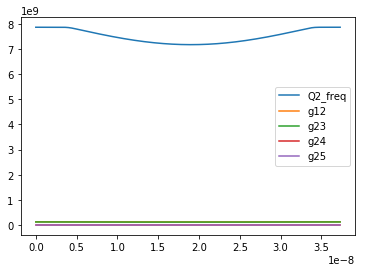

In [3]:
gate_time=30e-9
SRATE=10e9
total_len = gate_time + 8e-9

Seq=PG.Sequence(total_len=total_len,sample_rate=SRATE,complex_trace=False)
Seq.clear_pulse(tips_on=False)
Seq.add_pulse('Cos',t0=total_len/2,width=gate_time,plateau=0e-9,frequency=0,amplitude=0.101,half_cosine=True)
Seq.add_filter('Gauss Low Pass',300e6)
flux_pulse=Seq.get_sequence()

raw_config = Circuit_Simulator.RawConfig(qubit_num=5,dimension=3,circuit_type=1,initial_state='+Z+Z+Z+Z+Z',sampling_rate=SRATE)
raw_config.load_default_value(modulation=True,decoherence=False,use_capacitance=False)

raw_config.setValue('Q1 f01_max',6.0e9)
raw_config.setValue('Q2 f01_max',7.87e9)
raw_config.setValue('Q3 f01_max',5.4e9)
raw_config.setValue('Q4 f01_max',8.22e9)
raw_config.setValue('Q5 f01_max',6.1e9)

raw_config.setValue('Q1 f01_min',1e9)
raw_config.setValue('Q2 f01_min',1e9)
raw_config.setValue('Q3 f01_min',1e9)
raw_config.setValue('Q4 f01_min',1e9)
raw_config.setValue('Q5 f01_min',1e9)    


raw_config.setValue('Q1 Ec',0.25e9)
raw_config.setValue('Q2 Ec',0.30e9)
raw_config.setValue('Q3 Ec',0.25e9)
raw_config.setValue('Q4 Ec',0.30e9)
raw_config.setValue('Q5 Ec',0.25e9)

raw_config.setValue('r12',0.018)
raw_config.setValue('r23',0.018)
raw_config.setValue('r13',0.0015)
raw_config.setValue('r34',0.018)
raw_config.setValue('r45',0.018)
raw_config.setValue('r35',0.0015)

raw_config.setValue('r14',0.0)
raw_config.setValue('r15',0.0)
raw_config.setValue('r24',0.0000)
raw_config.setValue('r25',0.0000)

raw_config.setValue('Q2 Voltage period',-1)
raw_config.setValue('Q2 Voltage operating point',0)
raw_config.setValue('Q2 Flux',flux_pulse)

simu_config = Circuit_Simulator.read_config(raw_config.get_dict())
Simulator = Circuit_Simulator.Simulator(simu_config)
Simulator.show_pulse()

Simulator.performsimulation(solver_type=1)
Simulator.UnitaryResult.get_U(-1)

Simulator.UnitaryResult.get_subspace_operator(['00000','00001','00100','00101','10000','10001','10100','10101'])
Simulator.UnitaryResult.U_sub 

In [4]:
%matplotlib inline

In [6]:
diag_value = Simulator.UnitaryResult.U_sub.diag()

In [7]:
phaseQ3=np.angle(diag_value[1])-np.angle(diag_value[0])
phaseQ2=np.angle(diag_value[2])-np.angle(diag_value[0])
phaseQ1=np.angle(diag_value[4])-np.angle(diag_value[0])
print(phaseQ1,phaseQ2,phaseQ3)

-2.467104903178196 0.5240036816853255 -1.2647693060407716


In [15]:
all_phases = []

for amp in np.arange(0.0,0.251,0.05):
    gate_time=40e-9
    SRATE=20e9
    total_len = gate_time + 8e-9
    Seq=PG.Sequence(total_len=total_len,sample_rate=SRATE,complex_trace=False)
    Seq.clear_pulse(tips_on=False)
    Seq.add_pulse('Cos',t0=total_len/2,width=gate_time,plateau=0e-9,frequency=0,amplitude=amp,half_cosine=True)
    Seq.add_filter('Gauss Low Pass',300e6)
    flux_pulse=Seq.get_sequence()
    flux_pulse[0]=0
    flux_pulse[-1]=0
    
    raw_config = Circuit_Simulator.RawConfig(qubit_num=5,dimension=3,circuit_type=1,initial_state='+Z+Z+Z+Z+Z',sampling_rate=SRATE)
    raw_config.load_default_value(modulation=True,decoherence=False,use_capacitance=False)
    raw_config.setValue('Q1 f01_max',6.0e9)
    raw_config.setValue('Q2 f01_max',7.87e9)
    raw_config.setValue('Q3 f01_max',5.4e9)
    raw_config.setValue('Q4 f01_max',8.22e9)
    raw_config.setValue('Q5 f01_max',6.1e9)
    raw_config.setValue('Q1 f01_min',1e9)
    raw_config.setValue('Q2 f01_min',1e9)
    raw_config.setValue('Q3 f01_min',1e9)
    raw_config.setValue('Q4 f01_min',1e9)
    raw_config.setValue('Q5 f01_min',1e9)    
    raw_config.setValue('Q1 Ec',0.25e9)
    raw_config.setValue('Q2 Ec',0.30e9)
    raw_config.setValue('Q3 Ec',0.25e9)
    raw_config.setValue('Q4 Ec',0.30e9)
    raw_config.setValue('Q5 Ec',0.25e9)
    raw_config.setValue('r12',0.018)
    raw_config.setValue('r23',0.018)
    raw_config.setValue('r13',0.0015)
    raw_config.setValue('r34',0.018)
    raw_config.setValue('r45',0.018)
    raw_config.setValue('r35',0.0015)
    raw_config.setValue('r14',0.0)
    raw_config.setValue('r15',0.0)
    raw_config.setValue('r24',0.0000)
    raw_config.setValue('r25',0.0000)
    raw_config.setValue('Q2 Voltage period',-1)
    raw_config.setValue('Q2 Voltage operating point',0)
    raw_config.setValue('Q2 Flux',flux_pulse)
    simu_config = Circuit_Simulator.read_config(raw_config.get_dict(),remove_zeros=False)
    Simulator = Circuit_Simulator.Simulator(simu_config)
#     Simulator.show_pulse()
    Simulator.performsimulation(solver_type=1)
    Simulator.UnitaryResult.get_U(-1)
    Simulator.UnitaryResult.get_subspace_operator(['00000','00001','00100','00101','10000','10001','10100','10101'])
#     Simulator.UnitaryResult.get_subspace_operator(['000','001','100','101'])
    diag_value = Simulator.UnitaryResult.U_sub.diag()
    
    print(diag_value/diag_value[0])
    all_phases.append(diag_value/diag_value[0])

[ 1.        +0.j         -0.71593959-0.69816223j -0.86187743+0.50711664j
  0.97030067+0.24190205j -0.94300235+0.33278608j  0.90747139+0.42011389j
  0.64682189-0.7626411j  -0.99584189+0.09109847j]
[ 1.        +0.j         -0.71593956-0.69816226j -0.90431385+0.4268682j
  0.94436668+0.32889447j -0.99132192+0.13145667j  0.80150467+0.59798852j
  0.84260438-0.53853306j -0.97855639-0.20597911j]
[ 1.        +0.j         -0.71593951-0.69816231j -0.94820436+0.31766098j
  0.89918424+0.43757023j -0.9867816 -0.16205577j  0.59333472+0.80495584j
  0.9881559 -0.1534533j  -0.81265986-0.58273831j]
[ 1.        +0.j         -0.71593944-0.69816239j -0.98673898+0.16231508j
  0.81785926+0.5754183j  -0.81187148-0.58383619j  0.17363842+0.98480947j
  0.88948001+0.45697405j -0.31461832-0.94921825j]
[ 1.        +0.j         -0.7159393 -0.69816253j -0.99748046-0.07094172j
  0.66212453+0.74939382j -0.09201267-0.99575784j -0.62932506+0.77714218j
 -0.02435798+0.99970328j  0.71770687-0.69634532j]
[ 1.        +0.j     

In [210]:
# all_phases=phases

In [23]:
for i in range(6):
    print(np.angle(all_phases[i][7])-np.angle(all_phases[i][6]) )

3.9177542427729817
-2.3654333062543085
-2.3654364286801117
-2.3654411445502834
-2.3654494072520293
3.9177123168110346


In [25]:
(3.9177542427729817+2.3654333062543085)/2

3.141593774513645

In [212]:

for i in range(7):
    print( np.angle(all_phases[i][2])-np.angle(all_phases[i][1]) )

1.3180190484601735
-4.589836667027505
1.8810131249771793
-4.4772377661285265
0.8113274211926106
-3.7301456321944393
2.7594702693252566


In [221]:
for amp in np.arange(0.1,0.4,0.01):
    gate_time=40e-9
    SRATE=20e9
    total_len = gate_time + 8e-9
    Seq=PG.Sequence(total_len=total_len,sample_rate=SRATE,complex_trace=False)
    Seq.clear_pulse(tips_on=False)
    Seq.add_pulse('Cos',t0=total_len/2,width=gate_time,plateau=0e-9,frequency=0,amplitude=amp,half_cosine=True)
    Seq.add_filter('Gauss Low Pass',300e6)
    flux_pulse=Seq.get_sequence()

    raw_config = Circuit_Simulator.RawConfig(qubit_num=5,dimension=3,circuit_type=1,initial_state='+Z+Z+Z+Z+X',sampling_rate=SRATE)
    raw_config.load_default_value(modulation=True,decoherence=False,use_capacitance=False)
    raw_config.setValue('Q1 f01_max',6.0e9)
    raw_config.setValue('Q2 f01_max',7.87e9)
    raw_config.setValue('Q3 f01_max',5.4e9)
    raw_config.setValue('Q4 f01_max',8.22e9)
    raw_config.setValue('Q5 f01_max',6.1e9)

    raw_config.setValue('Q1 f01_min',1e9)
    raw_config.setValue('Q2 f01_min',1e9)
    raw_config.setValue('Q3 f01_min',1e9)
    raw_config.setValue('Q4 f01_min',1e9)
    raw_config.setValue('Q5 f01_min',1e9)   

    raw_config.setValue('Q1 Ec',0.25e9)
    raw_config.setValue('Q2 Ec',0.30e9)
    raw_config.setValue('Q3 Ec',0.25e9)
    raw_config.setValue('Q4 Ec',0.30e9)
    raw_config.setValue('Q5 Ec',0.25e9)

    raw_config.setValue('r12',0.018)
    raw_config.setValue('r23',0.018)
    raw_config.setValue('r13',0.0015)
    raw_config.setValue('r34',0.018)
    raw_config.setValue('r45',0.018)
    raw_config.setValue('r35',0.0015)
    raw_config.setValue('r14',0.0)
    raw_config.setValue('r15',0.0)
    raw_config.setValue('r24',0.0000)
    raw_config.setValue('r25',0.0000)
    
    raw_config.setValue('Q2 Voltage period',-1)
    raw_config.setValue('Q2 Voltage operating point',0)
    raw_config.setValue('Q2 Flux',flux_pulse)
    simu_config = Circuit_Simulator.read_config(raw_config.get_dict())
    Simulator = Circuit_Simulator.Simulator(simu_config)
    Simulator.performsimulation(solver_type=0)
    print(np.angle(Simulator.StateResult.rho_trace[-1][0][0][1]))

2.0785748741665555e-06
2.117601147124474e-06
2.1427450354202777e-06
2.185669943327585e-06
2.2243674176349745e-06
2.279117172391849e-06
2.317331536209842e-06
2.348343795328755e-06
2.364352273333742e-06
2.4180647442531673e-06
2.418081564399869e-06
2.4525408909398852e-06
2.4141629919642536e-06
2.3889120685982452e-06
1.663495617113963e-06
2.2162817820559157e-06
1.9005061826077144e-06
5.653530739984216e-07
8.019146146736502e-07
1.942280429137669e-06
4.153465055315263e-06
5.4398645725479185e-06
5.664337331449362e-06
4.911026010720302e-06
4.3257404029345685e-06
3.227666244299476e-06
3.2504721773516883e-06
4.076855690530955e-06
4.498261451228872e-06
4.970235932210076e-06


KeyboardInterrupt: 

In [281]:
# amp=0.4
# gate_time=40e-9
# SRATE=20e9
# total_len = gate_time + 8e-9
# Seq=PG.Sequence(total_len=total_len,sample_rate=SRATE,complex_trace=False)
# Seq.clear_pulse(tips_on=False)
# Seq.add_pulse('Cos',t0=total_len/2,width=gate_time,plateau=0e-9,frequency=0,amplitude=amp,half_cosine=True)
# Seq.add_filter('Gauss Low Pass',300e6)
# flux_pulse=Seq.get_sequence()

gate_time=30e-9
SRATE=10e9
f_term=1
lamb1 = 0.8578
total_len = gate_time + 6e-9

Seq=PG.Sequence(total_len=total_len,sample_rate=SRATE,complex_trace=False)
Seq.clear_pulse(tips_on=False)
Seq.add_pulse('Adiabatic',t0=total_len/2,width=gate_time,plateau=0e-9,frequency=0,F_Terms=f_term,Lcoeff=np.array(lamb1),Q1_freq=6.0e9,
             CPLR_idle_freq=7.87e9,Q2_freq=5.4e9,constant_coupling=False,r1c=0.018,r2c=0.018,r12=0.0015,anhar_CPLR=-300e6,
             anhar_Q1=-250e6,anhar_Q2=-250e6,negative_amplitude=False,dfdV=7.87e9-1e9,gap_threshold=8e6,freqpoints=301,pulsepoints=601)
Seq.add_filter('Gauss Low Pass',300e6)
flux_pulse=Seq.get_sequence()

raw_config = Circuit_Simulator.RawConfig(qubit_num=5,dimension=3,circuit_type=1,initial_state='+X+Z+X+Z+X',sampling_rate=SRATE)
raw_config.load_default_value(modulation=True,decoherence=False,use_capacitance=False)
raw_config.setValue('Q1 f01_max',6.0e9)
raw_config.setValue('Q2 f01_max',7.87e9)
raw_config.setValue('Q3 f01_max',5.4e9)
raw_config.setValue('Q4 f01_max',8.22e9)
raw_config.setValue('Q5 f01_max',6.1e9)

raw_config.setValue('Q1 f01_min',1e9)
raw_config.setValue('Q2 f01_min',1e9)
raw_config.setValue('Q3 f01_min',1e9)
raw_config.setValue('Q4 f01_min',1e9)
raw_config.setValue('Q5 f01_min',1e9)   

raw_config.setValue('Q1 Ec',0.25e9)
raw_config.setValue('Q2 Ec',0.30e9)
raw_config.setValue('Q3 Ec',0.25e9)
raw_config.setValue('Q4 Ec',0.30e9)
raw_config.setValue('Q5 Ec',0.25e9)

raw_config.setValue('r12',0.018)
raw_config.setValue('r23',0.018)
raw_config.setValue('r13',0.0015)
raw_config.setValue('r34',0.018)
raw_config.setValue('r45',0.018)
raw_config.setValue('r35',0.0015)
raw_config.setValue('r14',0.0000)
raw_config.setValue('r15',0.0000)
raw_config.setValue('r24',0.0000)
raw_config.setValue('r25',0.0000)

raw_config.setValue('Q2 Voltage period',-1)
raw_config.setValue('Q2 Voltage operating point',0)
raw_config.setValue('Q2 Flux',flux_pulse)
simu_config = Circuit_Simulator.read_config(raw_config.get_dict())
Simulator = Circuit_Simulator.Simulator(simu_config)
Simulator.performsimulation(solver_type=0)
print(np.angle(Simulator.StateResult.rho_trace[-1][0][0][1]))

-7.459007638849696e-05
